## Average # of pixels changed from frame to frame

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
def collect_observations(n, game, discard_duplicates=False):
    env = gym.make(game)
    env.reset()
    obs = []
    for i in range(n):
        observation,_,done,_ = env.step(env.action_space.sample())
        if done:
            observation = env.reset()
        if discard_duplicates:
            while is_in_arr_list(observation, obs):
                observation,_,done,_ = env.step(env.action_space.sample())
                if done:
                    observation = env.reset()
        obs.append(observation)
        
    return obs

In [3]:
atari_games_list = [
    "Alien-v0",
    "Amidar-v0",
    "Assault-v0",
    "Asterix-v0",
    "BankHeist-v0",
    "BattleZone-v0",
    "Boxing-v0",
    "Breakout-v0",
    "ChopperCommand-v0",
    "CrazyClimber-v0",
    "DemonAttack-v0",
    "Freeway-v0",
    "Gopher-v0",
    "Hero-v0",
    "Kangaroo-v0",
    "Krull-v0",
    "KungFuMaster-v0",
    "MsPacman-v0",
    "Pong-v0",
    "PrivateEye-v0",
    "Qbert-v0",
    "RoadRunner-v0",
    "YarsRevenge-v0",
    "Seaquest-v0"
]

In [4]:
## Refactor, throw away observations after I use them
n = 50000 # number of observations to collect

avg_percent_pixel_change = []
avg_percent_pixel_change_area = []

for game in atari_games_list:
    obs = collect_observations(n, game)
    n_pixels_changed = 0.
    pixels_changed_area = 0.
    pixels_total = 0
    for i in range(len(obs) -1):
        diff = obs[i+1] - obs[i]
        n_pixels_changed += np.count_nonzero(diff)
        pixels_total += diff.size
        #print(pixels_changed)
        
        pixels_changed = diff.nonzero()
        if pixels_changed[0].size != 0:
            min_d1 = np.min(pixels_changed[0])
            min_d2 = np.min(pixels_changed[1])
            max_d1 = np.max(pixels_changed[0])
            max_d2 = np.max(pixels_changed[1])
            changed_area = diff[min_d1:max_d1+1,min_d2:max_d2+1,:]

            pixels_changed_area += changed_area.size
    
    avg_percent_pixel_change.append(100*n_pixels_changed/pixels_total)
    print("For " + game.ljust(20) + 
          ", average change is    {0:.3f}%   the total number of pixel transitions".format(avg_percent_pixel_change[-1]))
    
    avg_area_change = 100*pixels_changed_area/pixels_total
    avg_percent_pixel_change_area.append(avg_area_change)
    print("For " + game.ljust(20) + ", average changed area is   " + \
          " {0:.3f}%   the total area".format(avg_area_change))

For Alien-v0            , average change is    0.583%   the total number of pixel transitions
For Alien-v0            , average changed area is    26.543%   the total area
For Amidar-v0           , average change is    0.169%   the total number of pixel transitions
For Amidar-v0           , average changed area is    14.128%   the total area
For Assault-v0          , average change is    3.682%   the total number of pixel transitions
For Assault-v0          , average changed area is    40.414%   the total area
For Asterix-v0          , average change is    0.694%   the total number of pixel transitions
For Asterix-v0          , average changed area is    20.052%   the total area
For BankHeist-v0        , average change is    12.060%   the total number of pixel transitions
For BankHeist-v0        , average changed area is    19.453%   the total area
For BattleZone-v0       , average change is    10.951%   the total number of pixel transitions
For BattleZone-v0       , average changed ar

## Plotting

In [5]:
## Formatting
games_list_formatted = atari_games_list.copy()
for i in range(len(games_list_formatted)):
    if (i + 2) % 3 == 0:
        games_list_formatted[i] = "\n" + games_list_formatted[i].rsplit("-")[0]
    elif (i + 1) % 3 == 0:
        games_list_formatted[i] = "\n\n" + games_list_formatted[i].rsplit("-")[0]
    else:
        games_list_formatted[i] = games_list_formatted[i].rsplit("-")[0]

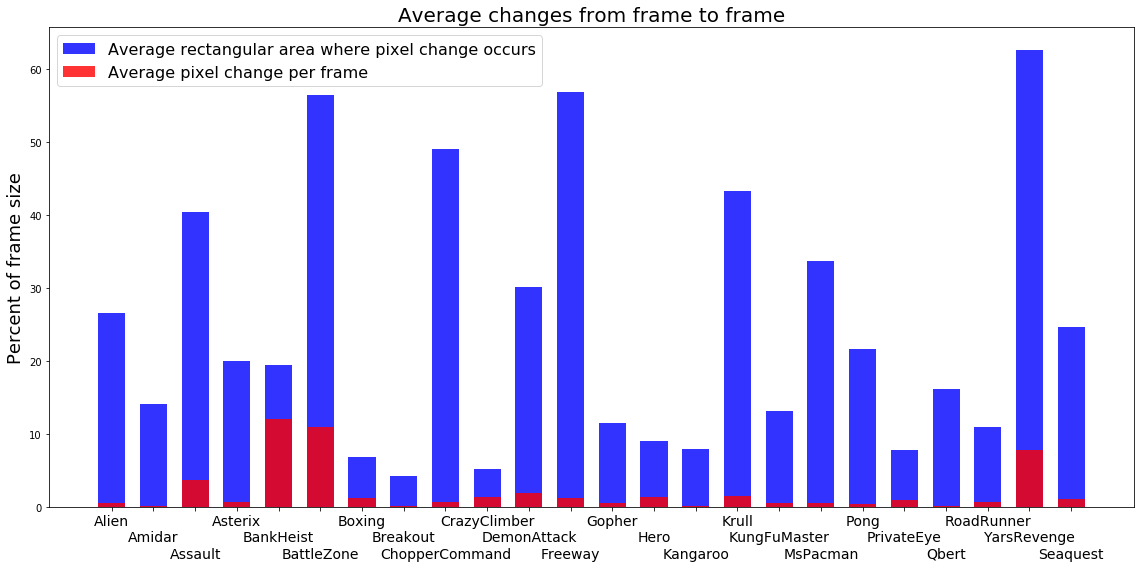

In [6]:
n_groups = len(atari_games_list)

# create plot
plt.figure(figsize=(16,8))
index = np.arange(n_groups)
bar_width = 0.65
opacity = 0.8

rects1 = plt.bar(index, avg_percent_pixel_change_area, bar_width,
alpha=opacity,
color='b',
label='Average rectangular area where pixel change occurs')

rects2 = plt.bar(index, avg_percent_pixel_change, bar_width,
alpha=opacity,
color='r',
label='Average pixel change per frame')



plt.title('Average changes from frame to frame', fontsize=20)
plt.xticks(index, games_list_formatted, fontsize=14)
plt.ylabel("Percent of frame size", fontsize=18)
plt.legend(prop={'size': 16})

plt.tight_layout()
plt.savefig("pixel_changes.png")
plt.show()



In [7]:
import seaborn as sns
sns.set()

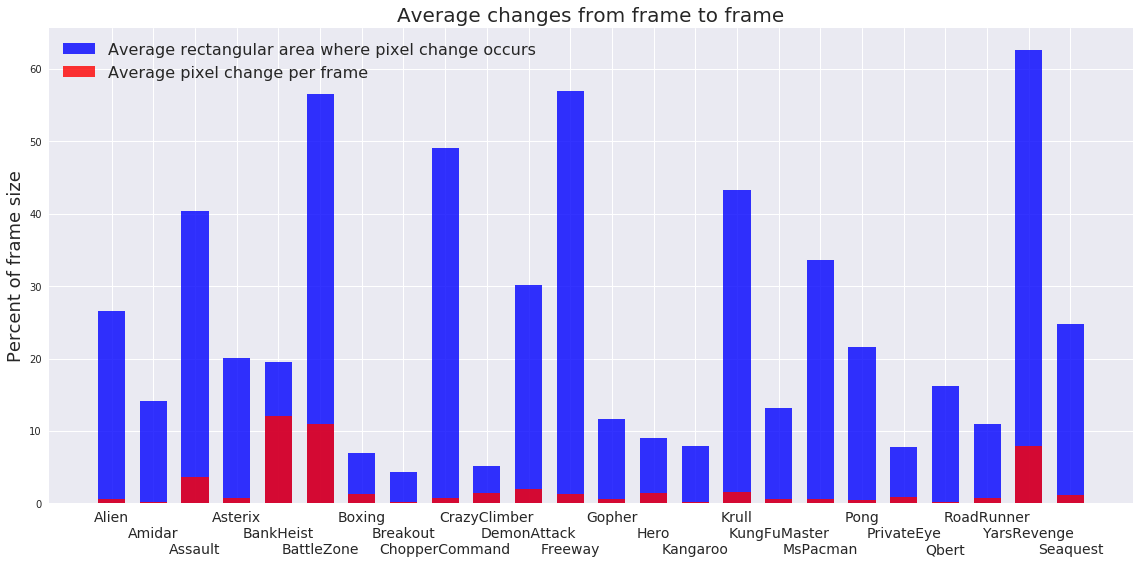

In [8]:
n_groups = len(atari_games_list)

# create plot
plt.figure(figsize=(16,8))
index = np.arange(n_groups)
bar_width = 0.65
opacity = 0.8

rects1 = plt.bar(index, avg_percent_pixel_change_area, bar_width,
alpha=opacity,
color='b',
label='Average rectangular area where pixel change occurs')

rects2 = plt.bar(index, avg_percent_pixel_change, bar_width,
alpha=opacity,
color='r',
label='Average pixel change per frame')



plt.title('Average changes from frame to frame', fontsize=20)
plt.xticks(index, games_list_formatted, fontsize=14)
plt.ylabel("Percent of frame size", fontsize=18)
plt.legend(prop={'size': 16})

plt.tight_layout()
plt.savefig("pixel_changes_sns.png")
plt.show()

